In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

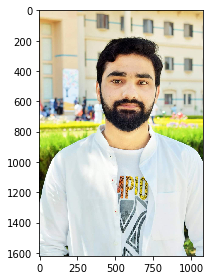

In [ ]:
image1 = imread('pic.jpeg')
imshow(image1);

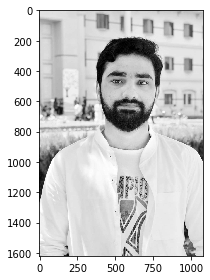

In [ ]:
image2 = imread('pic.jpeg', as_gray=True)
imshow(image2);

In [ ]:
#Shape of images
print(image1.shape)
print(image2.shape)

(1620, 1080, 3)
(1620, 1080)


In [ ]:
print(image1.size)
print(image2.size)

5248800
1749600


**Feature extraction**

1. Pixel Features

In [ ]:
pixel_feat1 = np.reshape(image2, (1620 * 1080))
pixel_feat1

array([0.87459098, 0.87459098, 0.87459098, ..., 0.87074588, 0.87074588,
       0.87074588])

In [ ]:
pixel_feat2 = np.reshape(image1, (1620 * 1080 * 3))
pixel_feat2

array([238, 222, 189, ..., 207, 225, 237], dtype=uint8)

2. Edge Features

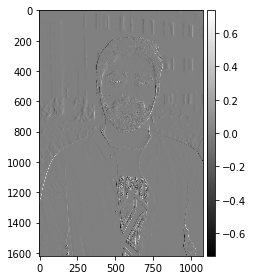

In [ ]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
# prewitt kernel
pre_hor = prewitt_h(image2)
pre_ver = prewitt_v(image2)

# Sobel Kernel
ed_sobel = filters.sobel(image2)

#canny algorithm
can = feature.canny(image2)

imshow(pre_ver, cmap='gray');

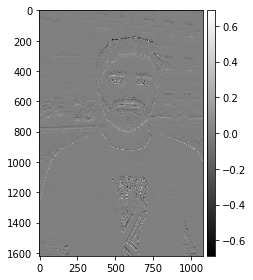

In [ ]:
imshow(pre_hor, cmap='gray');

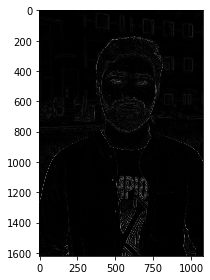

In [ ]:
imshow(ed_sobel, cmap='gray');

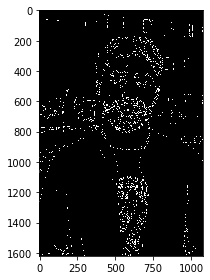

In [ ]:
imshow(can, cmap='gray')

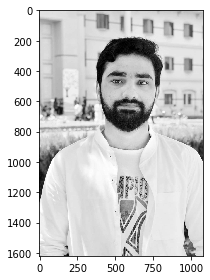

In [ ]:
from skimage import color 
grayscale = color.rgb2gray(image1) 

imshow(grayscale)
plt.show()

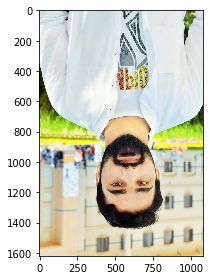

In [ ]:
# Flip the image in up direction 
verticalflip = np.flipud(image1)

imshow(verticalflip)
plt.show()

(256, 128, 3)


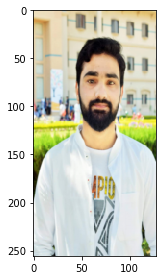

In [ ]:
from skimage.transform import resize
resized_img = resize(image1, (256,128)) 
imshow(resized_img) 
print(resized_img.shape)

In [ ]:
# resized_img=image1

In [ ]:
from skimage.feature import hog
from skimage import exposure
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

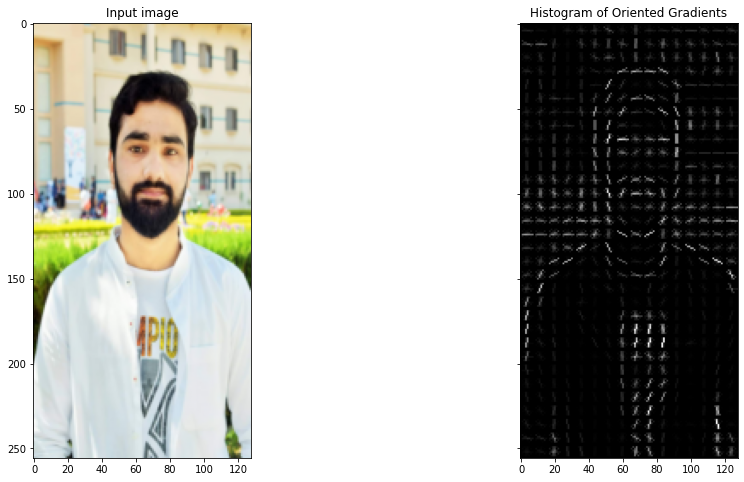

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
#feature vector
fd

array([0.01248235, 0.        , 0.00918697, ..., 0.00757382, 0.15219384,
       0.28484673])